In [177]:
# Importamos las librerías que previsiblemente necesitaremos
import pandas as pd
import numpy as np
# from src.support import obtener_df_coordenadas, buscar_lugares, obtener_servicios_municipios

# Importar librerias para las visualizaciones
import matplotlib.pyplot as plt
import seaborn as sns

# Ignoramos los warnings
import warnings
warnings.filterwarnings("ignore")


# **ANÁLISIS EDA**

## **Contexto**

El presente análisis parte de que somos una empresa organizadora de viajes, y nuestros clientes son Juan y Sara, una pareja, que quiere irse del 22 al 24 de Noviembre, de viaje para desconectar. Han pensado que quiere ir a Barcelona o a Santiago de Compostela. 

No quieren gastar mucho, por eso quieren billetes en clase turista, y quieren que nosotros les demos información sobre hoteles y actividades (les interesan las típicas actividades turisticas, pues no conocen a fondo ninguna de las dos ciudades), en base a la cual decidirán por cual destino se decantan.

Con arreglo a estas premisas, nostros, mediante escrapeo de la web de civitatis, y uso de las APIS de tripadvisor y Skyscraper (ambas de rapidapi) hemos recabado una serie de datos, con los que reaizar nuestro análisis.

## **EDA**

En primer lugar cargamos los 6 dataframes que hemos obtenido para hacer nuestro analisis.

In [178]:
# Dataframes de actividades
df_actividades_barcelona = pd.read_csv("datos/actividades_barcelona.csv")
df_actividades_santiago = pd.read_csv("datos/actividades_santiago.csv")

# Dataframes de hoteles
df_hoteles_barcelona  = pd.read_csv("datos/hoteles_barcelona.csv")
df_hoteles_santiago = pd.read_csv("datos/hoteles_santiago.csv")

# Dataframes de vuelos
df_vuelos_barcelona  = pd.read_csv("datos/vuelos_barcelona.csv")
df_vuelos_santiago = pd.read_csv("datos/vuelos_santiago.csv")




Empecemos analizando los DataFrames de actividades

In [179]:
df_actividades_barcelona.head()

,Nombre,Puntuación,Precio,Descripción,Link
0,Visita de la Sagrada Familia sin colas,8.6,55.0,Si hay un lugar que nadie puede perderse en Ba...,https://www.civitatis.com/es/barcelona/visita-...
1,Free tour por Barcelona,9.5,0.0,El free tour por Barcelona es la mejor forma d...,https://www.civitatis.com/es/barcelona/free-to...
2,Excursión a Montserrat con tren cremallera,8.4,57.0,En esta excursión a Montserrat podréis visitar...,https://www.civitatis.com/es/barcelona/excursi...
3,Visita guiada por el Parque Güell,7.7,NaN,En esta visita guiada por el Parque Güell de B...,https://www.civitatis.com/es/barcelona/visita-...
4,Sagrada Familia con subida a las torres,7.8,70.0,En esta visita a la Sagrada Familia conoceremo...,https://www.civitatis.com/es/barcelona/visita-...


In [180]:
df_actividades_santiago.head()

,Nombre,Puntuación,Precio,Descripción,Link
0,"Excursión a las Rías Baixas, isla de Arosa y C...",9.1,42,Los paisajes de las Rías Baixas cautivan a tod...,https://www.civitatis.com/es/santiago-de-compo...
1,Free tour por Santiago de Compostela,9.3,0,Recorre el centro histórico de Santiago de Com...,https://www.civitatis.com/es/santiago-de-compo...
2,Excursión a Finisterre y Costa da Morte de día...,8.7,49,Dejaos cautivar por los paisajes del cabo Fini...,https://www.civitatis.com/es/santiago-de-compo...
3,Visita guiada por la Catedral de Santiago,9.2,15,Descubrid uno de los iconos de la capital de G...,https://www.civitatis.com/es/santiago-de-compo...
4,Excursión a las Rías Baixas + Visita a una bodega,8.9,42,"Una bodega de albariño, un paseo en barco por ...",https://www.civitatis.com/es/santiago-de-compo...


In [181]:
media_barcelona = df_actividades_barcelona['Puntuación'].mean()
media_santiago = df_actividades_santiago['Puntuación'].mean()

# Crear un DataFrame con las puntuaciones medias
df_medias = pd.DataFrame({
    'Ciudad': ['Barcelona', 'Santiago'],
    'Puntuación Media': [media_barcelona, media_santiago]
})

df_medias



,Ciudad,Puntuación Media
0,Barcelona,8.890000
1,Santiago,9.236842


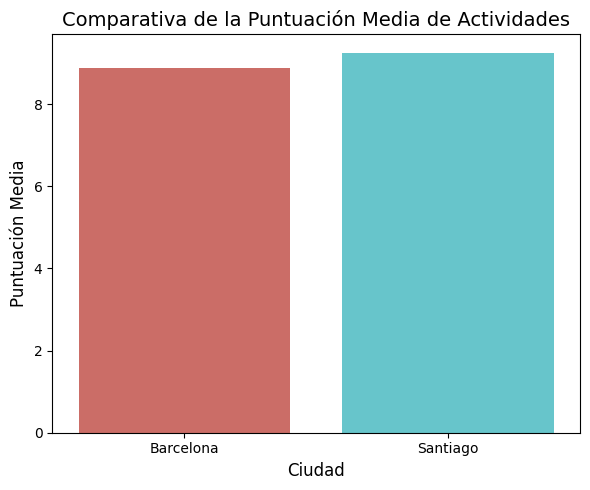

In [182]:
# Visualización con seaborn
plt.figure(figsize=(6,5))
sns.barplot(x='Ciudad', y='Puntuación Media', data=df_medias, palette="hls")

# Añadir etiquetas y título
plt.title('Comparativa de la Puntuación Media de Actividades', fontsize=14)
plt.ylabel('Puntuación Media', fontsize=12)
plt.xlabel('Ciudad', fontsize=12)

# Ajustar el layout
plt.tight_layout()

# Mostrar la gráfica
plt.show()

La puntuación media de las actividades de Santiago es superior a la de Barcelona

Veamos que pasa con los precios

In [183]:
# Calculamos la media de los precios en ambos dataframes
media_precio_barcelona = df_actividades_barcelona['Precio'].mean()
media_precio_santiago = df_actividades_santiago['Precio'].mean()

# Hacemos un DataFrame con la media de los precios de las actividades en ambas ciduades
df_precio_medias = pd.DataFrame({
    'Ciudad': ['Barcelona', 'Santiago'],
    'Precio Medio': [media_precio_barcelona, media_precio_santiago]
})

df_precio_medias

,Ciudad,Precio Medio
0,Barcelona,47.117647
1,Santiago,36.000000


In [184]:
diferencia_precio = media_precio_barcelona - media_precio_santiago
print("Las actividades de Barcelona son de media más caras que las de Santiago, la diferencia es: ", diferencia_precio, "euros")

Las actividades de Barcelona son de media más caras que las de Santiago, la diferencia es:  11.117647058823529 euros


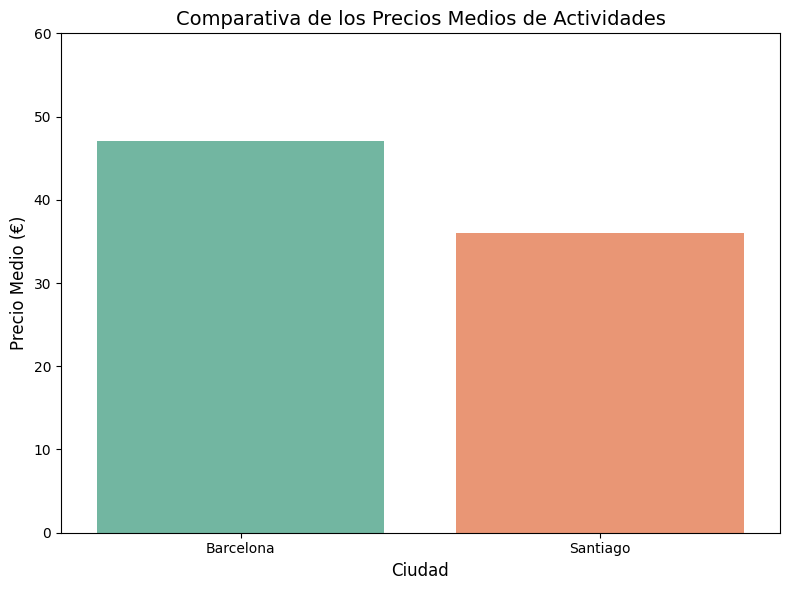

In [185]:
# Visualización de la diferencia de precios
plt.figure(figsize=(8, 6))
sns.barplot(x='Ciudad', y='Precio Medio', data=df_precio_medias, palette="hls")

# Añadir etiquetas y título
plt.title('Comparativa de los Precios Medios de Actividades', fontsize=14)
plt.ylabel('Precio Medio (€)', fontsize=12)
plt.xlabel('Ciudad', fontsize=12)

# Ajustar la escala del eje y
plt.ylim(0, 60)

# Ajustar el layout
plt.tight_layout()

Comparamos ahora el precio de las 5 actividades con mayor puntuación en cada ciudad

In [186]:
# Seleccionamos las 5 actividades con mayor puntuación en cada ciudad
top_5_barcelona = df_actividades_barcelona.nlargest(5, 'Puntuación')
top_5_santiago = df_actividades_santiago.nlargest(5, 'Puntuación')

# Creamos un DataFrame con las actividades de ambas ciudades y restablecemoa el índice
df_top_5_actividades = pd.concat([top_5_barcelona, top_5_santiago]).reset_index(drop=True)

df_top_5_actividades['Ciudad'] = ['Barcelona'] * 5 + ['Santiago'] * 5


df_top_5_actividades

,Nombre,Puntuación,Precio,Descripción,Link,Ciudad
0,Excursión a Montserrat + Visita a una bodega,10.0,NaN,En esta excursión a Montserrat no solo disfrut...,https://www.civitatis.com/es/barcelona/tour-ta...,Barcelona
1,Free tour de Gaudí y la Barcelona modernista,9.7,0.0,Acompañadnos a visitar el corazón de Barcelona...,https://www.civitatis.com/es/barcelona/tour-ba...,Barcelona
2,Free tour nocturno por el Barrio Gótico,9.6,0.0,En este free tour nocturno por el Barrio Gótic...,https://www.civitatis.com/es/barcelona/tour-no...,Barcelona
3,Free tour por Barcelona,9.5,0.0,El free tour por Barcelona es la mejor forma d...,https://www.civitatis.com/es/barcelona/free-to...,Barcelona
4,"Excursión a Gerona, Figueras y Cadaqués",9.4,55.0,Si estáis en Barcelona y queréis visitar lo me...,https://www.civitatis.com/es/barcelona/excursi...,Barcelona
5,"Tour por la Ciudad de la Cultura, Pazo de Riva...",10.0,28.0,En este tour por los alrededores de Santiago d...,https://www.civitatis.com/es/santiago-de-compo...,Santiago
6,Tour en 4x4 por La Coruña y Pontevedra,9.8,129.0,Historia y naturaleza os esperan en este tour ...,https://www.civitatis.com/es/santiago-de-compo...,Santiago
7,Tour privado por la Catedral de Santiago y su ...,9.6,65.0,En este tour privado por la Catedral de Santia...,https://www.civitatis.com/es/santiago-de-compo...,Santiago
8,Tour de Santiago de Compostela al completo con...,9.5,45.0,"La plaza del Obradoiro, la Catedral, el Pórtic...",https://www.civitatis.com/es/santiago-de-compo...,Santiago
9,Free tour por el Santiago oculto,9.5,0.0,Dejaos sorprender en este free tour por el San...,https://www.civitatis.com/es/santiago-de-compo...,Santiago


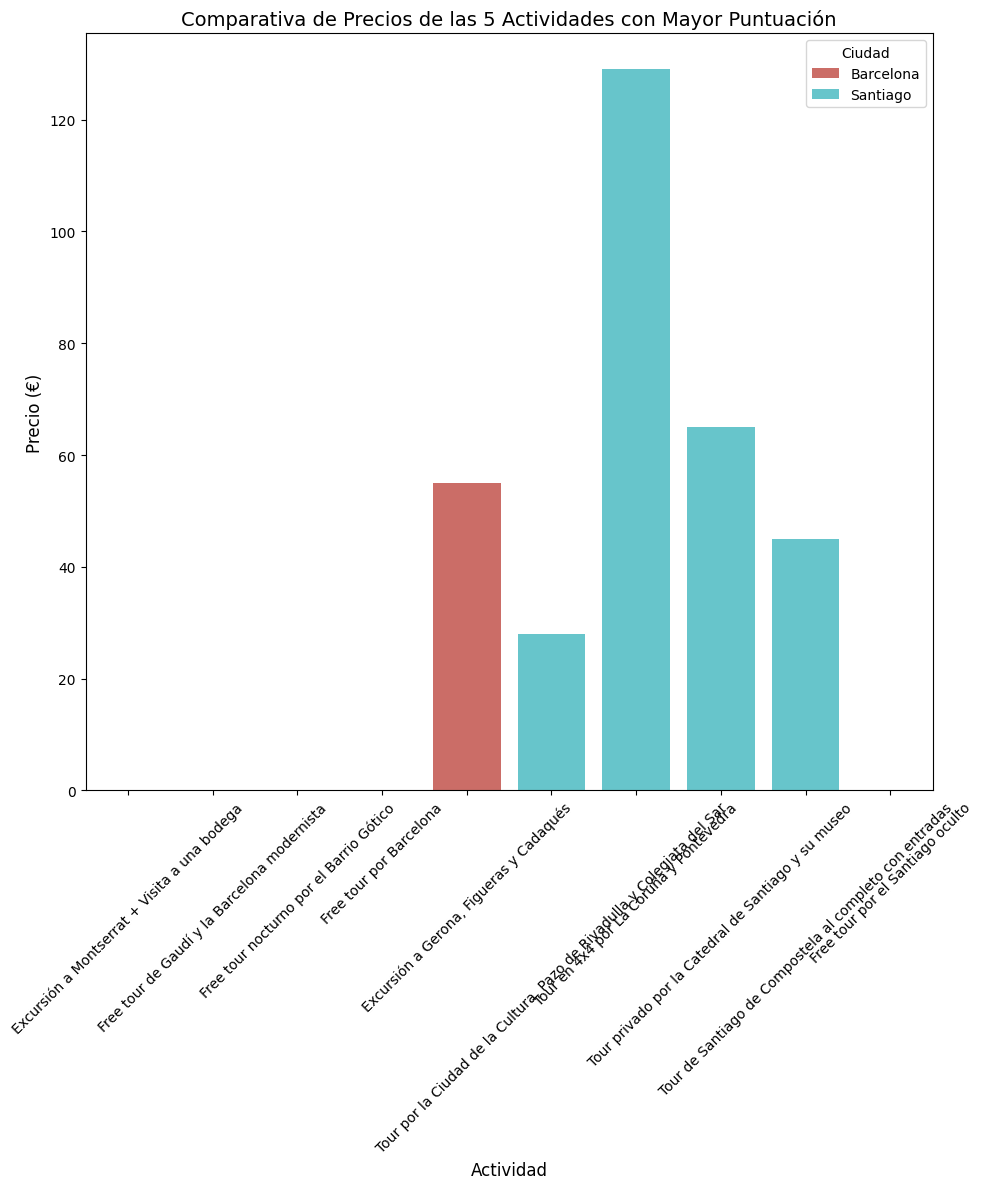

In [187]:
# Visualización de la comparativa de precios de las 5 actividades con mayor puntuación
plt.figure(figsize=(10, 12))
sns.barplot(x='Nombre', y='Precio', hue='Ciudad', data=df_top_5_actividades, palette="hls")

# Añadir etiquetas y título
plt.title('Comparativa de Precios de las 5 Actividades con Mayor Puntuación', fontsize=14)
plt.ylabel('Precio (€)', fontsize=12)
plt.xlabel('Actividad', fontsize=12)
plt.xticks(rotation=45)

# Ajustar el layout
plt.tight_layout()

# Mostrar la gráfica
plt.show()

A pesar de que la media es más barata en Santiago, vemos que las actividades mejor puntuadas son más caras en las ciudad gallega que en Barcelona. También observamos que varias de las mejor puntaudas son gratuitas o de coste cero. Lo cual puede ser información útil para nuestra pareja de clientes, Juan y Sara que busca minimizar costes. La mayoría de estas actividades gratuitas y de gran puntuacióne está en Barcelona.

Comparemos ahora la puntuación de las 5 actividades más baratas de cada ciudad

In [188]:
top_5_baratas_barcelona = df_actividades_barcelona.nsmallest(5, 'Precio')
top_5_baratas_santiago = df_actividades_santiago.nsmallest(5, 'Precio')

df_top_5_baratas = pd.concat([top_5_baratas_barcelona, top_5_baratas_santiago]).reset_index(drop=True)

df_top_5_baratas['Ciudad'] = ['Barcelona'] * 5 + ['Santiago'] * 5

df_top_5_baratas


,Nombre,Puntuación,Precio,Descripción,Link,Ciudad
0,Free tour por Barcelona,9.5,0.0,El free tour por Barcelona es la mejor forma d...,https://www.civitatis.com/es/barcelona/free-to...,Barcelona
1,Free tour de Gaudí y la Barcelona modernista,9.7,0.0,Acompañadnos a visitar el corazón de Barcelona...,https://www.civitatis.com/es/barcelona/tour-ba...,Barcelona
2,Free tour nocturno por el Barrio Gótico,9.6,0.0,En este free tour nocturno por el Barrio Gótic...,https://www.civitatis.com/es/barcelona/tour-no...,Barcelona
3,Free tour de los misterios y leyendas del Barr...,9.4,0.0,Acompañadnos en este free tour por Barcelona e...,https://www.civitatis.com/es/barcelona/free-to...,Barcelona
4,Tour de los misterios y leyendas de Barcelona,9.1,14.0,En esta ruta nocturna por Barcelona descubrire...,https://www.civitatis.com/es/barcelona/tour-mi...,Barcelona
5,Free tour por Santiago de Compostela,9.3,0.0,Recorre el centro histórico de Santiago de Com...,https://www.civitatis.com/es/santiago-de-compo...,Santiago
6,Free tour de los misterios y leyendas de Santiago,9.4,0.0,En este free tour exploraremos los rincones má...,https://www.civitatis.com/es/santiago-de-compo...,Santiago
7,Free tour por el Santiago oculto,9.5,0.0,Dejaos sorprender en este free tour por el San...,https://www.civitatis.com/es/santiago-de-compo...,Santiago
8,Free tour de las mujeres ilustres de Santiago ...,NaN,0.0,En este free tour de las mujeres ilustres de S...,https://www.civitatis.com/es/santiago-de-compo...,Santiago
9,Free tour por el Santiago contemporáneo,9.3,0.0,Si os apasiona la arquitectura y queréis descu...,https://www.civitatis.com/es/santiago-de-compo...,Santiago


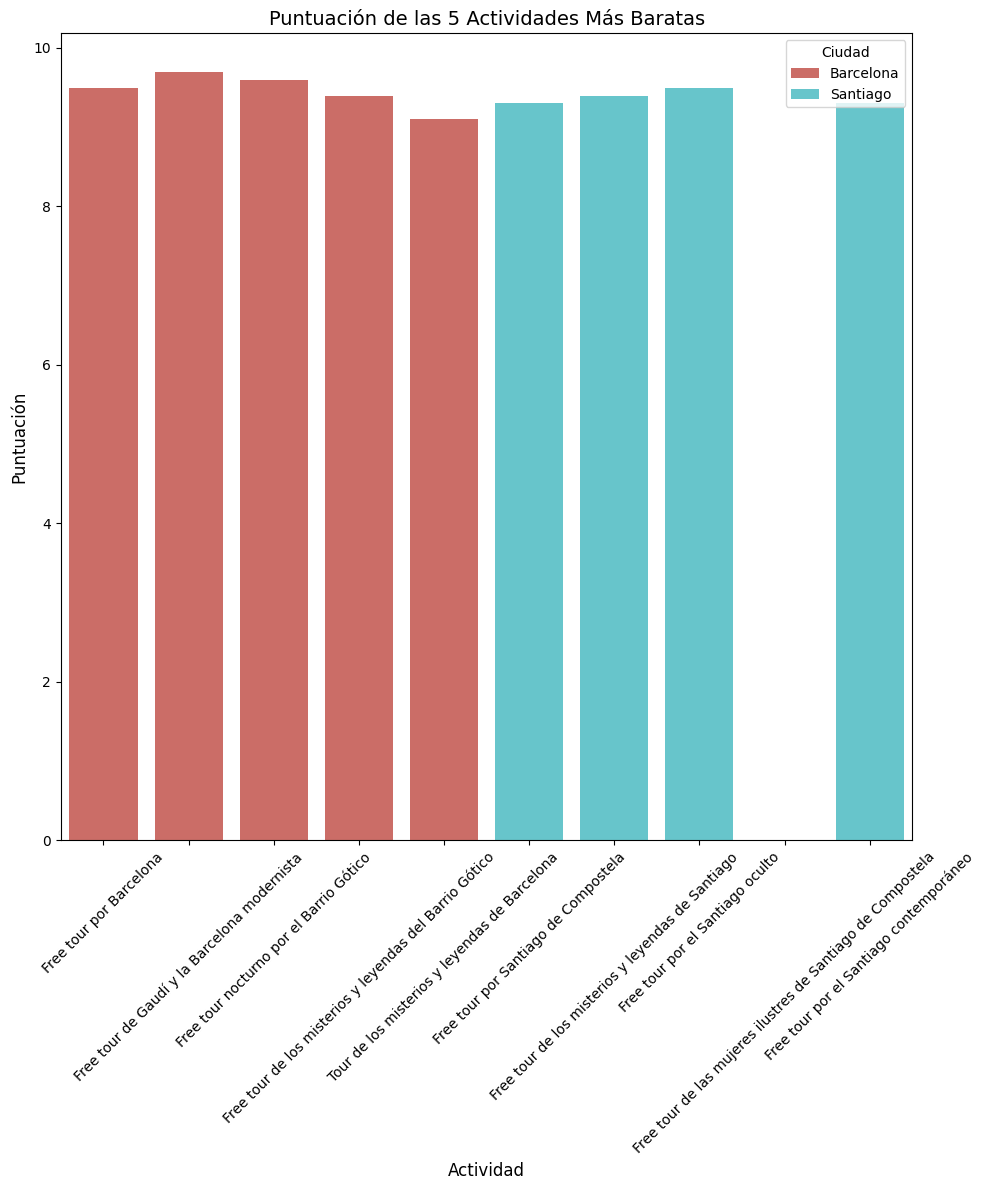

In [189]:
# Visualización de la comparativa de puntuaciones de las 5 actividades más baratas
plt.figure(figsize=(10, 12))
sns.barplot(x='Nombre', y='Puntuación', hue='Ciudad', data=df_top_5_baratas, palette="hls")

plt.title('Puntuación de las 5 Actividades Más Baratas', fontsize=14)
plt.ylabel('Puntuación', fontsize=12)
plt.xlabel('Actividad', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

En este aspecto también gana Barcelona, sus actividades más baratas tienen (tres de las cinco), mejor puntuación que las más baratas de Santiago

Pasamos a analizar los hoteles de ambas ciudades

In [190]:
df_hoteles_barcelona.head()

,nombre,numero_reviews,rating,precio_medio_por noche,ciudad,servicios,link
0,Hostemplo Sagrada Familia,448,4.0,166.5,Barcelona,['Free Wifi'],https://www.tripadvisor.com/Hotel_Review-g1874...
1,Andante Hotel,2818,4.5,195.5,Barcelona,"['Free Wifi', 'Pool', 'Outdoor pool', 'Fitness...",https://www.tripadvisor.com/Hotel_Review-g1874...
2,Hyatt Regency Barcelona Tower,3567,4.5,241.0,Barcelona,"['Free Wifi', 'Pool', 'Heated pool', 'Indoor p...",https://www.tripadvisor.com/Hotel_Review-g1874...
3,Hotel Astoria,1901,4.5,175.5,Barcelona,"['Free Wifi', 'Pool', 'Outdoor pool', 'Restaur...",https://www.tripadvisor.com/Hotel_Review-g1874...
4,Majestic Hotel & Spa Barcelona,4263,4.5,446.0,Barcelona,"['Free Wifi', 'Pool', 'Outdoor pool', 'Restaur...",https://www.tripadvisor.com/Hotel_Review-g1874...


In [191]:
df_hoteles_santiago.head()

,nombre,numero_reviews,rating,precio_medio_por noche,ciudad,servicios,link
0,Hotel Spa Relais & Chateaux A Quinta da Auga,1116,4.5,252.0,Santiago de Compostela,"['Free Wifi', 'Free parking', 'Breakfast inclu...",https://www.tripadvisor.com/Hotel_Review-g1875...
1,Hotel Compostela,764,4.0,124.0,Santiago de Compostela,"['Free Wifi', 'Room service', 'Bar/Lounge']",https://www.tripadvisor.com/Hotel_Review-g1875...
2,Hotel Restaurante Asador De Roxos Casa Albardo...,233,4.5,91.0,Santiago de Compostela,"['Free Wifi', 'Free parking', 'Breakfast inclu...",https://www.tripadvisor.com/Hotel_Review-g1870...
3,Gran Hotel Los Abetos,808,4.5,135.5,Santiago de Compostela,"['Free Wifi', 'Free parking', 'Outdoor pool', ...",https://www.tripadvisor.com/Hotel_Review-g1875...
4,Casa Grande do Bachao,431,5.0,120.5,Santiago de Compostela,"['Free parking', 'Pool', 'Outdoor pool', 'Rest...",https://www.tripadvisor.com/Hotel_Review-g1875...


Comparamos el rating promedio de los hoteles de ambas ciuadades

In [192]:
# Calculamos el rating medio
rating_promedio_barcelona = df_hoteles_barcelona['rating'].mean()
rating_promedio_santiago = df_hoteles_santiago['rating'].mean()

# Crear mosun DataFrame con los ratings promedios
df_ratings_promedio = pd.DataFrame({
    'Ciudad': ['Barcelona', 'Santiago'],
    'Rating Promedio': [rating_promedio_barcelona, rating_promedio_santiago]
})

df_ratings_promedio


,Ciudad,Rating Promedio
0,Barcelona,4.306452
1,Santiago,4.102941


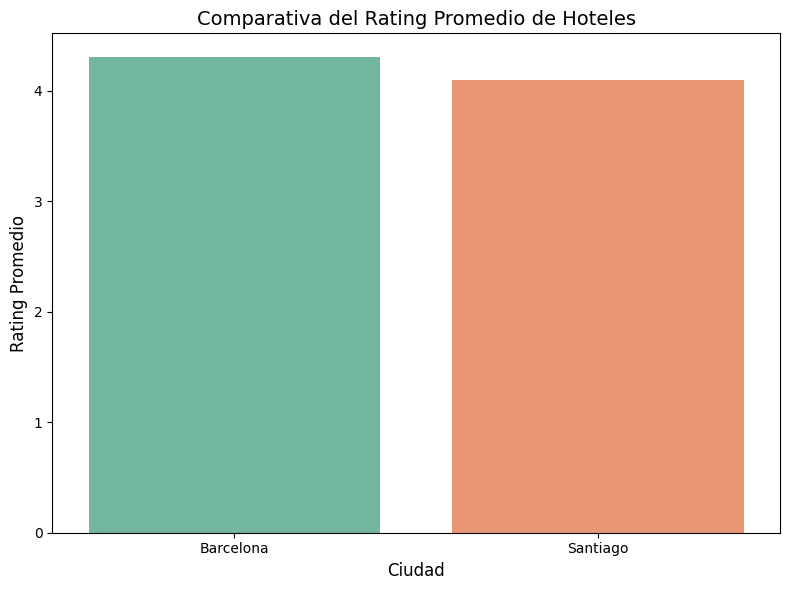

In [193]:
# Visualización con seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='Ciudad', y='Rating Promedio', data=df_ratings_promedio, palette="hls")

plt.title('Comparativa del Rating Promedio de Hoteles', fontsize=14)
plt.ylabel('Rating Promedio', fontsize=12)
plt.xlabel('Ciudad', fontsize=12)


plt.tight_layout()

plt.show()

Observamos que de media los hoteles de Barcelona tienen mejor rating que los de Santiago.

Comparemos la media de los precios de los hoteles

In [194]:
# Calcular el precio promedio por ciudad
precio_promedio_barcelona = df_hoteles_barcelona['precio_medio_por noche'].mean()
precio_promedio_santiago = df_hoteles_santiago['precio_medio_por noche'].mean()

# Crear un DataFrame con los precios promedio
df_precio_promedio = pd.DataFrame({
    'Ciudad': ['Barcelona', 'Santiago'],
    'Precio Promedio': [precio_promedio_barcelona, precio_promedio_santiago]
})

df_precio_promedio



,Ciudad,Precio Promedio
0,Barcelona,218.387097
1,Santiago,107.941176


In [195]:
diferencia_precio_promedio = precio_promedio_barcelona - precio_promedio_santiago
print("Los hotles de Barcelona son de media más caros que los de Santiago, la diferencia es: ", diferencia_precio_promedio, "euros")

Los hotles de Barcelona son de media más caros que los de Santiago, la diferencia es:  110.4459203036053 euros


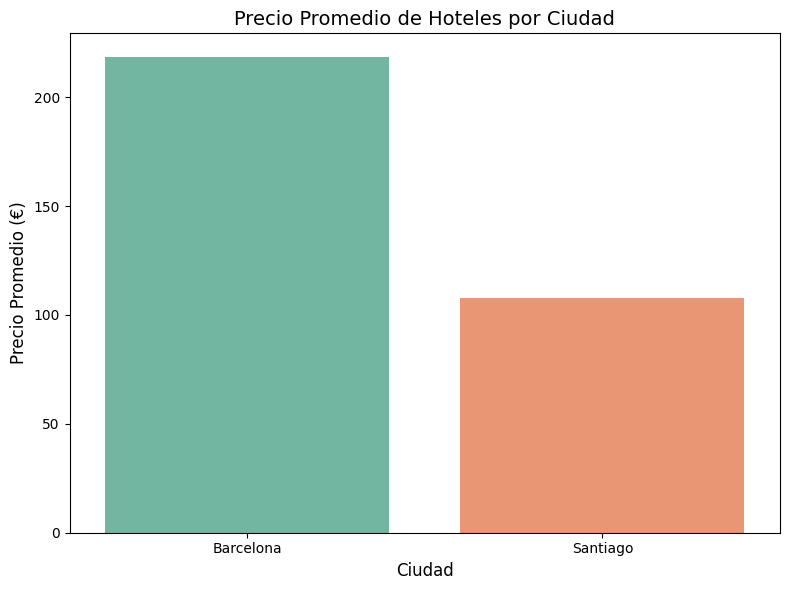

In [196]:
# Visualización de los precios promedio
plt.figure(figsize=(8, 6))
sns.barplot(x='Ciudad', y='Precio Promedio', data=df_precio_promedio, palette="hls")

plt.title('Precio Promedio de Hoteles por Ciudad', fontsize=14)
plt.ylabel('Precio Promedio (€)', fontsize=12)
plt.xlabel('Ciudad', fontsize=12)
t
plt.tight_layout()

# Mostrar la gráfica
plt.show()

Hacemos ahora, diagramas de cajas con los precios de los hoteles de cada ciudad para comparar la distribución de los precios

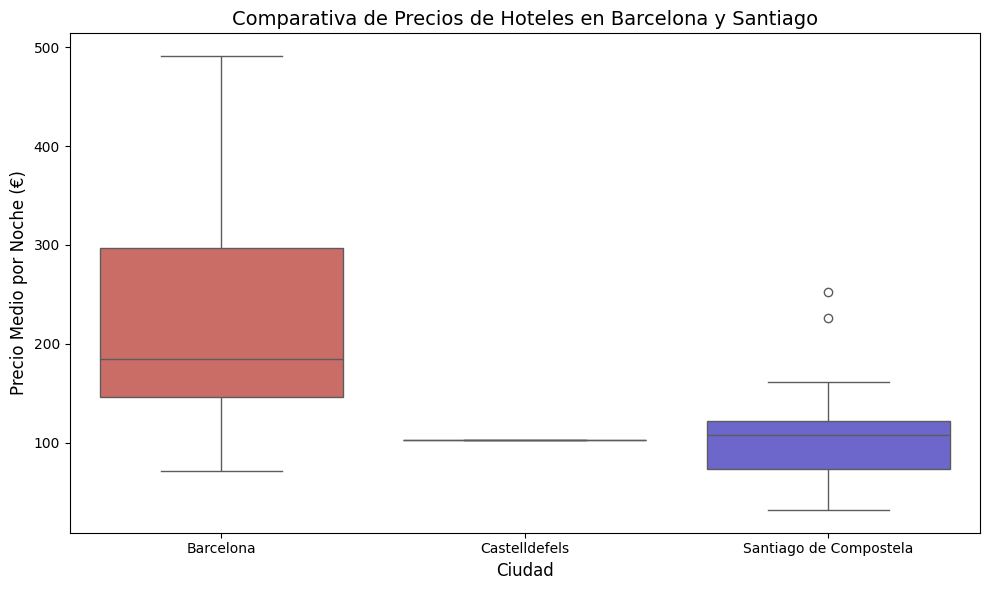

In [197]:
#Creamos df_hoteles, como concatenación de los dataframes de los hoteles de ambas ciudades
df_hoteles = pd.concat([df_hoteles_barcelona, df_hoteles_santiago])

plt.figure(figsize=(10, 6))

# Boxplot de los precios por ciudad
sns.boxplot(x='ciudad', y='precio_medio_por noche', data=df_hoteles, palette="hls")


plt.title('Comparativa de Precios de Hoteles en Barcelona y Santiago', fontsize=14)
plt.ylabel('Precio Medio por Noche (€)', fontsize=12)
plt.xlabel('Ciudad', fontsize=12)

plt.tight_layout()


plt.show()


Se ilustra de nueveo la notable diferencia de precios entre Barcelona y Santiago, aún más, en Santiago hay una pr de valores atípicos por arriba que desvirtuan algo al media. Sin esos valores, el precio emdio de lso hoteles en Santiago sería aún más bajo

Nos fijamos ahora en los hoteles con mejor relación calidad precio

In [198]:
# Creamos una nueva columna que calcule la relación precio-calidad (rating/precio) para cada hotel
df_hoteles['Relación Calidad-Precio'] = df_hoteles['rating'] / df_hoteles['precio_medio_por noche']

top_5_hoteles_relacion_calidad_precio = df_hoteles.nlargest(5, 'Relación Calidad-Precio')
top_5_hoteles_relacion_calidad_precio

,nombre,numero_reviews,rating,precio_medio_por noche,ciudad,servicios,link,Relación Calidad-Precio
8,La Credencial,43,4.5,32.0,Santiago de Compostela,['Free Wifi'],https://www.tripadvisor.com/Hotel_Review-g1875...,0.140625
7,Monte do Gozo,11,3.5,51.0,Santiago de Compostela,"['Free Wifi', 'Free parking', 'Pool', 'Restaur...",https://www.tripadvisor.com/Hotel_Review-g1875...,0.068627
20,Hotel Windsor,200,4.0,63.5,Santiago de Compostela,"['Free Wifi', 'Bar/Lounge']",https://www.tripadvisor.com/Hotel_Review-g1875...,0.062992
6,Hotel Real,145,4.0,69.5,Santiago de Compostela,"['Free Wifi', 'Breakfast included', 'Bar/Lounge']",https://www.tripadvisor.com/Hotel_Review-g1875...,0.057554
24,Can Seuba,17,4.0,71.0,Barcelona,"['Free Wifi', 'Pets Allowed', 'Bar/Lounge']",https://www.tripadvisor.com/Hotel_Review-g1874...,0.056338


Vemos que 4 de los 5 hoteles con mejor relación caldiad precio son de Santiago de Compestela

Sacamos ahora los 5 hoteles más baratos que tengan wifi gratis entre sus servicios.

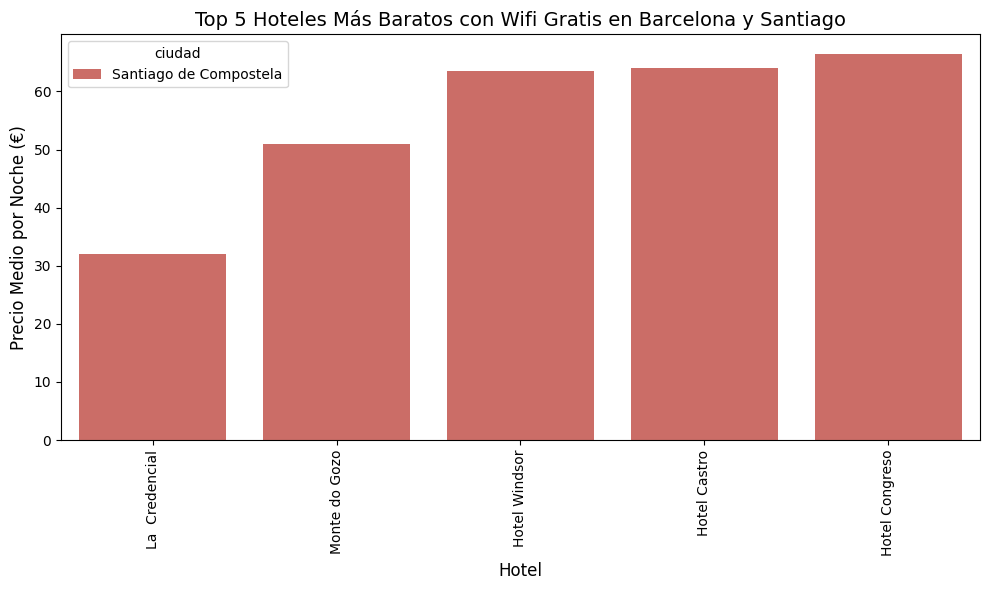

In [163]:
# Filtramos los hoteles que tienen wifi gratis entre sus servicios
hoteles_con_wifi_gratis = df_hoteles[df_hoteles['servicios'].str.contains('Free Wifi', case=False)]

# Seleccionamos los 5 más baratos entre lso filtrados
top_5_hoteles_wifi_baratos = hoteles_con_wifi_gratis.nsmallest(5, 'precio_medio_por noche')

# Visualización de los 5 hoteles más baratos con wifi gratis
plt.figure(figsize=(10, 6))
sns.barplot(x='nombre', y='precio_medio_por noche', hue='ciudad', data=top_5_hoteles_wifi_baratos, palette="hls")

plt.title('Top 5 Hoteles Más Baratos con Wifi Gratis en Barcelona y Santiago', fontsize=14)
plt.ylabel('Precio Medio por Noche (€)', fontsize=12)
plt.xlabel('Hotel', fontsize=12)
plt.xticks(rotation=90)

plt.tight_layout()

plt.show()


Observamos que los 5 son de Santiago de Comostela.

Pasamos ahora a analizar DataFrames de vuelos.

In [164]:
df_vuelos_barcelona.head()

,id_origen,ciudad_origen,id_destino,ciudad_destino,salida,llegada,duracion(min),escalas,aerolinea,precio
0,MAD,Madrid,BCN,Barcelona,2024-11-22 07:15:00,2024-11-22 08:30:00,75,0,Iberia,119.81
1,BCN,Barcelona,MAD,Madrid,2024-11-24 15:15:00,2024-11-24 16:40:00,85,0,Iberia,119.81
2,MAD,Madrid,BCN,Barcelona,2024-11-22 10:30:00,2024-11-22 11:45:00,75,0,Iberia,149.04
3,BCN,Barcelona,MAD,Madrid,2024-11-24 15:15:00,2024-11-24 16:40:00,85,0,Iberia,149.04
4,MAD,Madrid,BCN,Barcelona,2024-11-22 06:45:00,2024-11-22 08:00:00,75,0,Iberia,111.98


In [165]:
df_vuelos_santiago

,id_origen,ciudad_origen,id_destino,ciudad_destino,salida,llegada,duracion(min),escalas,aerolinea,precio
0,MAD,Madrid,SCQ,Santiago de Compostela,2024-11-22 10:55:00,2024-11-22 12:15:00,80,0,Ryanair,88.90
1,SCQ,Santiago de Compostela,MAD,Madrid,2024-11-24 08:05:00,2024-11-24 09:20:00,75,0,Ryanair,88.90
2,MAD,Madrid,SCQ,Santiago de Compostela,2024-11-22 11:50:00,2024-11-22 13:05:00,75,0,Iberia,178.48
3,SCQ,Santiago de Compostela,MAD,Madrid,2024-11-24 13:45:00,2024-11-24 15:00:00,75,0,Iberia,178.48
4,MAD,Madrid,SCQ,Santiago de Compostela,2024-11-22 07:30:00,2024-11-22 08:45:00,75,0,Iberia,135.96
5,SCQ,Santiago de Compostela,MAD,Madrid,2024-11-24 13:45:00,2024-11-24 15:00:00,75,0,Iberia,135.96
6,MAD,Madrid,SCQ,Santiago de Compostela,2024-11-22 20:20:00,2024-11-22 21:40:00,80,0,Ryanair,102.10
7,SCQ,Santiago de Compostela,MAD,Madrid,2024-11-24 08:05:00,2024-11-24 09:20:00,75,0,Ryanair,102.10
8,MAD,Madrid,SCQ,Santiago de Compostela,2024-11-22 11:50:00,2024-11-22 13:05:00,75,0,Iberia,209.00
9,SCQ,Santiago de Compostela,MAD,Madrid,2024-11-24 13:45:00,2024-11-24 15:00:00,75,0,Iberia Express,209.00


En primer lugar comparamos el precio medio de los vuelos entre ambos destinos

In [166]:
# Calculamos el precio promedio para los vuelos a Barcelona y a Santiago
precio_promedio_barcelona = df_vuelos_barcelona['precio'].mean()
precio_promedio_santiago = df_vuelos_santiago['precio'].mean()

# Creamos un DataFrame con los precios promedio
df_precio_promedio_vuelos = pd.DataFrame({
    'Ciudad': ['Barcelona', 'Santiago'],
    'Precio Promedio': [precio_promedio_barcelona, precio_promedio_santiago]
})

df_precio_promedio_vuelos


,Ciudad,Precio Promedio
0,Barcelona,136.568421
1,Santiago,187.938947


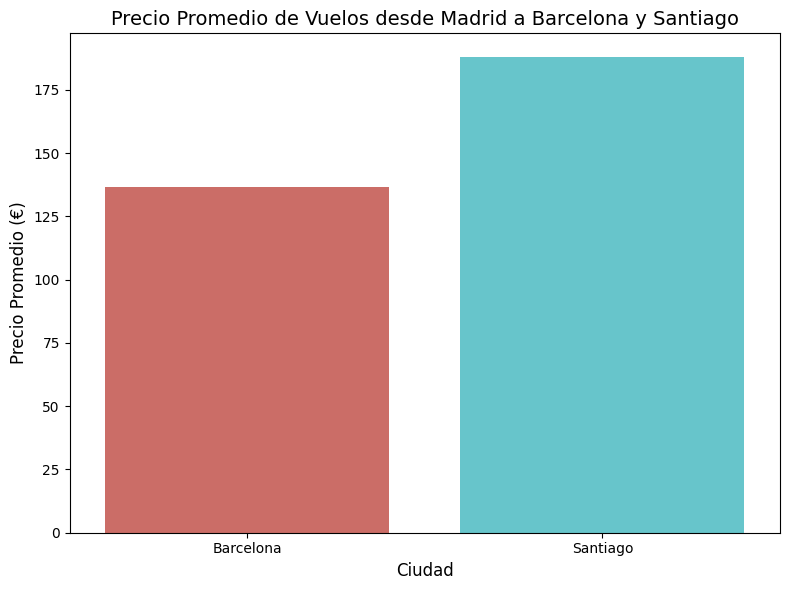

In [167]:
# Visualización de los precios promedio de los vuelos de Madri a Barcelona y Santiago
plt.figure(figsize=(8, 6))
sns.barplot(x='Ciudad', y='Precio Promedio', data=df_precio_promedio_vuelos, palette="hls")

plt.title('Precio Promedio de Vuelos desde Madrid a Barcelona y Santiago', fontsize=14)
plt.ylabel('Precio Promedio (€)', fontsize=12)
plt.xlabel('Ciudad', fontsize=12)

plt.tight_layout()

plt.show()

In [168]:
diferencia_precio_promedio_vuelo = precio_promedio_santiago - precio_promedio_barcelona
print("Los vuelos entre Madrid y Santiago son de media más caros que entre Madrid y Barcelona, la diferencia es: ", diferencia_precio_promedio_vuelo, "euros")

Los vuelos entre Madrid y Santiago son de media más caros que entre Madrid y Barcelona, la diferencia es:  51.370526315789476 euros


Comparamos ahora los precios por aerolinea, para tratar de ver cual es la más barata

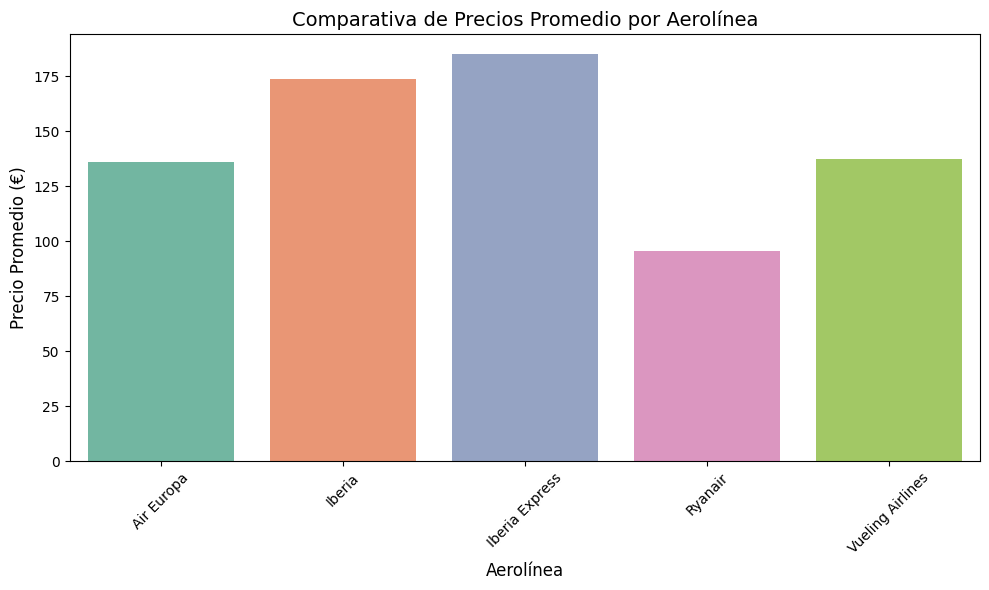

In [169]:
df_vuelos = pd.concat([df_vuelos_barcelona, df_vuelos_santiago])
df_vuelos_por_aerolinea = df_vuelos.groupby('aerolinea')['precio'].mean().reset_index()

# Visualización de la comparación de precios por aerolínea
plt.figure(figsize=(10, 6))
sns.barplot(x='aerolinea', y='precio', data=df_vuelos_por_aerolinea, palette="Set2")

plt.title('Comparativa de Precios Promedio por Aerolínea', fontsize=14)
plt.ylabel('Precio Promedio (€)', fontsize=12)
plt.xlabel('Aerolínea', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()

plt.show()


Con escasa sorpresa vemos que Iberia e Iberia Express son las más caras y Ryanair la más barata

Queremos ver ahora la distribución, mediante un boxplot de los precios por viajar a cada ciudad

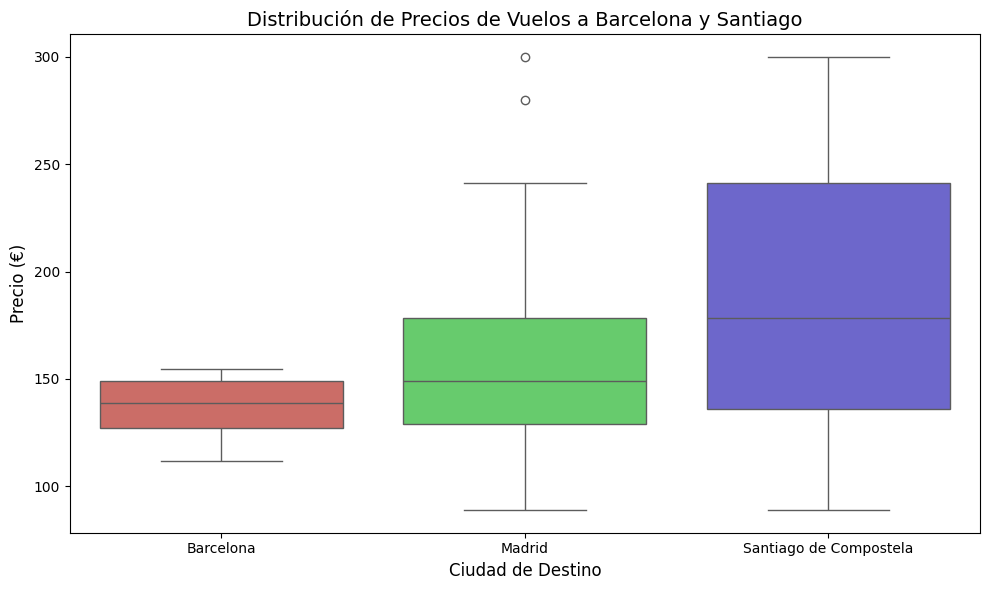

In [171]:
plt.figure(figsize=(10, 6))

# Boxplot de los precios por ciudad de destino
sns.boxplot(x='ciudad_destino', y='precio', data=df_vuelos, palette="hls")

plt.title('Distribución de Precios de Vuelos a Barcelona y Santiago', fontsize=14)
plt.ylabel('Precio (€)', fontsize=12)
plt.xlabel('Ciudad de Destino', fontsize=12)


plt.tight_layout()

plt.show()


Los precios a Sntiago son los que más varian, pero en su margen alto son claramente superiores a los precios de viajar a Barcelona.

Comparemos ahora el precio medio del vuelo según la hora de salida del mismo

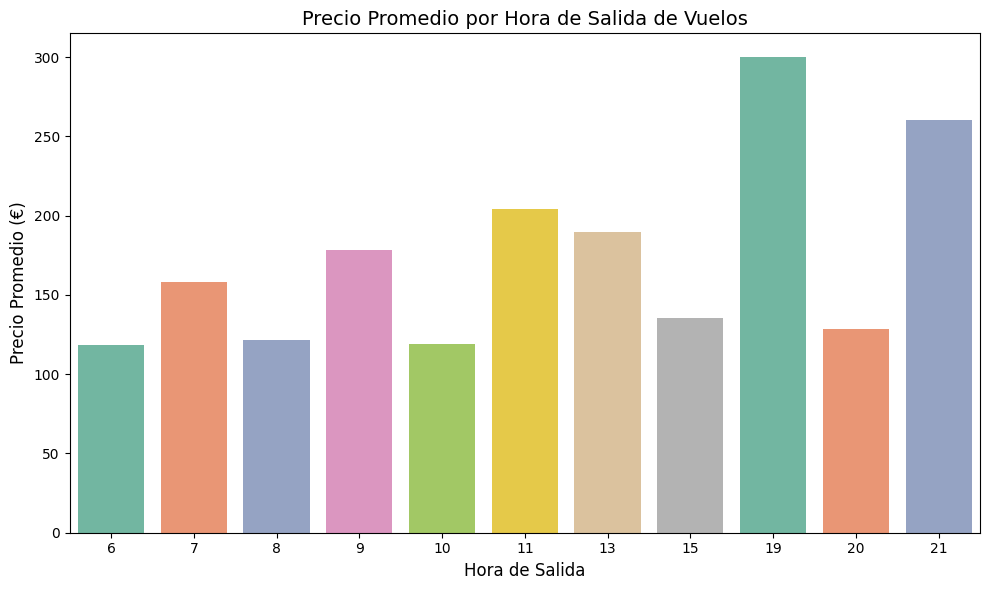

In [172]:
# Agrupamos los vuelos por la hora de salida y calculamos el precio medio
df_vuelos['hora_salida'] = pd.to_datetime(df_vuelos['salida']).dt.hour

# Calculamos el precio medio por hora de salida
precios_por_hora = df_vuelos.groupby('hora_salida')['precio'].mean().reset_index()

# Visualización de las horas de vuelo más baratas
plt.figure(figsize=(10, 6))
sns.barplot(x='hora_salida', y='precio', data=precios_por_hora, palette="Set2")

plt.title('Precio Promedio por Hora de Salida de Vuelos', fontsize=14)
plt.ylabel('Precio Promedio (€)', fontsize=12)
plt.xlabel('Hora de Salida', fontsize=12)

plt.tight_layout()

plt.show()


Las 19:00 es la hora más economica para coger un vuel, seguida de las 21:00

Queremos finalmente calcular la opción más economica para viajar (ida y vuelta) de Madrid a Santiago y de Madrid a Barcelona

In [173]:
#Quereos sacar las cobinaciones de ida y vuelta para Barcelona y para Santiago desde Madrid

vuelos_ida_barcelona = df_vuelos_barcelona[df_vuelos_barcelona['ciudad_origen'] == 'Madrid']
vuelos_vuelta_barcelona = df_vuelos_barcelona[df_vuelos_barcelona['ciudad_origen'] == 'Barcelona']

# Filtramos vuelos de ida y vuelta para Santiago
vuelos_ida_santiago = df_vuelos_santiago[df_vuelos_santiago['ciudad_origen'] == 'Madrid']
vuelos_vuelta_santiago = df_vuelos_santiago[df_vuelos_santiago['ciudad_origen'] == 'Santiago de Compostela']

# Combinamos vuelos de ida y vuelta para Barcelona
combinaciones_barcelona = vuelos_ida_barcelona.merge(vuelos_vuelta_barcelona, on='aerolinea', suffixes=('_ida', '_vuelta'))
combinaciones_barcelona['precio_total'] = combinaciones_barcelona['precio_ida'] + combinaciones_barcelona['precio_vuelta']

# Hacemos lo mismo para Santiago
combinaciones_santiago = vuelos_ida_santiago.merge(vuelos_vuelta_santiago, on='aerolinea', suffixes=('_ida', '_vuelta'))
combinaciones_santiago['precio_total'] = combinaciones_santiago['precio_ida'] + combinaciones_santiago['precio_vuelta']

In [176]:
# Viaje más económico de ida y vuelta para Barcelona
viaje_mas_economico_barcelona = combinaciones_barcelona.nsmallest(1, 'precio_total')

# Viaje más económico de ida y vuelta para Santiago
viaje_mas_economico_santiago = combinaciones_santiago.nsmallest(1, 'precio_total')

viaje_mas_economico_barcelona[['aerolinea', 'precio_total', 'salida_ida', 'llegada_ida', 'salida_vuelta', 'llegada_vuelta']], viaje_mas_economico_santiago[['aerolinea', 'precio_total', 'salida_ida', 'llegada_ida', 'salida_vuelta', 'llegada_vuelta']]

viajes_mas_economicos = pd.concat([viaje_mas_economico_barcelona, viaje_mas_economico_santiago])

viajes_mas_economicos_df = viajes_mas_economicos[['aerolinea', 'ciudad_destino_ida', 'precio_total', 'salida_ida', 'llegada_ida', 'salida_vuelta', 'llegada_vuelta']]

viajes_mas_economicos_df



,aerolinea,ciudad_destino_ida,precio_total,salida_ida,llegada_ida,salida_vuelta,llegada_vuelta
14,Iberia,Barcelona,223.96,2024-11-22 06:45:00,2024-11-22 08:00:00,2024-11-24 15:15:00,2024-11-24 16:40:00
0,Ryanair,Santiago de Compostela,177.80,2024-11-22 10:55:00,2024-11-22 12:15:00,2024-11-24 08:05:00,2024-11-24 09:20:00


La opción más barata es ir y volver a santiago de Compostela con Ryan Air.

## Conclusiones

- Del estudio de los DataFrames de las actividades en Barcelona y Santiago obtenemos que si bien las actividades en Santiago son de media más baratas y con mejor puntuación entre los usuarios, las actividades con mayor puntuación son más caras en Santiago que en Barclona, y también que entre las actividades más baratas están ligeramente mejor punutadas las de Barcelona

- Del estudio de los hoteles, se concluye claramente que los hoteles más económicos y con mejor relación calidad-precio están en Santiago. l unico medidor en esta categoría en el que sale mejor parado Barcelona que Santiago es en el rating de los hoteles, pues es ligeramente mejor en la ciudad catalana

- Del estudio de los viajes en avión se concluye que si bien en general es más economico viajar desde Madrid a Barcelona, la combianción más barata es a Santiago. En ese sentido hay que tener en cuenta que a Barcelona la combinación más barata es con Iberia y a Galicia es con Ryanairw, pues como hemos visto en la grafica correspondiente hay diferencias imortantes en los precios entre companias.

- Llegados a este punto, a la hora de hacer la oferta a Juan y Sara, nuestros clientes, si deciden primar, como decian las premisas que establecimos en el contexto, el aspecto económico parece claro que la opción más interesante para ellos es ir a Santiago. No ostante, como empresa considero que puede ser acertado presentarles ambas opciones y que ellso elijan con la información queles demos.

## Propuestas de mejora


Sin las limitaciones temporales de la realización y entrega del Proyecto se podrían incorporar una serie de mejoras:

- Una guia de Restuaurntes en ambas ciduades, con precios y cartas.

- Una medición de las distancias desde ada hotel a los lugares de las actividades.

- Una estudio del precio, calidad y accesibilidad del transporte públcio en ambas ciudades

- Un analisis que abarcase más aspectos a parte del económico. En todo caso, en las premisas que establecimos en el contexto estaba el facor economico como determinante en la decisión de nuestros clientes ficticios.